# Descriptive Analysis

In [1]:
import pandas as pd
from datetime import datetime
from collections import Counter

In [2]:
df_UAE = pd.read_csv('df_UAE.csv')

In [3]:
df_UAE.adj_enhancedlocations

0                                 ['United Arab Emirates']
1        ['United Arab Emirates', 'Qatar', 'Qatar', 'Un...
2        ['United Arab Emirates', 'United Arab Emirates...
3        ['United Arab Emirates', 'United Arab Emirates...
4                                 ['United Arab Emirates']
                               ...                        
71735    ['United Arab Emirates', 'United Arab Emirates...
71736    ['Scotland', 'Scotland', 'Scotland', 'United A...
71737                             ['United Arab Emirates']
71738     ['United Arab Emirates', 'United Arab Emirates']
71739    ['Russian', 'United Arab Emirates', 'United Ar...
Name: adj_enhancedlocations, Length: 71740, dtype: object

**word count**

In [4]:
df_UAE['adj_enhancedthemes'] = df_UAE['adj_enhancedthemes'].apply(lambda x: [word.strip('[').strip(']').strip("'") for word in x.split(', ')])
df_UAE['adj_enhancedlocations'] = df_UAE['adj_enhancedlocations'].apply(lambda x: [word.strip('[').strip(']').strip("'") for word in x.split(', ')])


In [5]:
df_UAE['adj_enhancedlocations'].iloc[1]

['United Arab Emirates',
 'Qatar',
 'Qatar',
 'United Arab Emirates',
 'United Arab Emirates']

In [6]:
# word count and world cloud for UAE

# Explode the words_column into separate rows
exploded_df_UAE = df_UAE.explode('adj_enhancedthemes')
word_counts = exploded_df_UAE['adj_enhancedthemes'].value_counts()

print(word_counts[:20])


TAX                 1084310
FNCACT               480606
ETHNICITY            446903
ARAB                 392581
EPU                  164184
HEALTH               124171
CRISISLEX            113468
POLICY                95793
SOC                   84975
GOVERNMENT            82899
TRANSPORT             77492
ECON                  75668
ECONOMY               73237
GENERAL               69031
EDUCATION             60227
POINTSOFINTEREST      58112
USPEC                 56340
SECTOR                55499
UNGP                  54797
MEDIA                 54274
Name: adj_enhancedthemes, dtype: int64


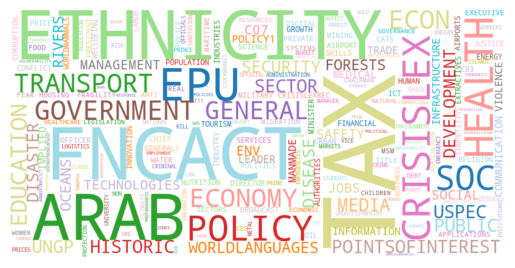

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with the word counts
wordcloud = WordCloud(background_color='white',
    contour_color='steelblue',
    width=800,
    height=400,
    colormap='tab20').generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
df_UAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71740 entries, 0 to 71739
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gkgrecordid            71740 non-null  object 
 1   date                   71740 non-null  object 
 2   subsourcecommonname    71740 non-null  object 
 3   documentidentifier     71740 non-null  object 
 4   enhancedthemes         71740 non-null  object 
 5   enhancedlocations      71740 non-null  object 
 6   tone                   71740 non-null  object 
 7   extrasxml              52130 non-null  object 
 8   translationinfo        0 non-null      float64
 9   adj_enhancedthemes     71740 non-null  object 
 10  adj_enhancedlocations  71740 non-null  object 
 11  Egypt Proportion       71740 non-null  float64
 12  UAE Proportion         71740 non-null  float64
 13  KSA Proportion         71740 non-null  float64
dtypes: float64(4), object(10)
memory usage: 7.7+ MB


In [33]:
# Definition of the filter keywords
# CONSUMPTION
filter = ['CONSUMPTION','CONSUME','CONSUMER','PURCHASE','PURCHASING','PURCHASER','BUYER']
df_UAE_CONSUME = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

# TRADE
filter = ['TRADE']
df_UAE_TRADE = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

# EMPLOYMENT
filter = ['EMPLOYMENT','UNEMPLOYMENT']
df_UAE_EMPLOY = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

In [43]:
def top_cooccuring_words(word,word_column):
    coocurrences = Counter()
    for row in word_column:
        if word in row:
            coocurrences.update(row)
    # Filter out the word 'TRADE'
    coocurrences.pop(word, None)
    top_words = coocurrences.most_common(10)
    print('the top-10 words which co-occured the most with: {}'.format(word))
    return top_words

print(top_cooccuring_words('TRADE',df_UAE.adj_enhancedthemes))
print(top_cooccuring_words('UNEMPLOYMENT',df_UAE.adj_enhancedthemes))
print(top_cooccuring_words('ENVIRONMENT',df_UAE.adj_enhancedthemes))


the top-10 words which co-occured the most with: TRADE
[('TAX', 203286), ('ETHNICITY', 90097), ('FNCACT', 85858), ('ARAB', 79214), ('EPU', 44097), ('POLICY', 25776), ('ECON', 24724), ('ECONOMY', 23504), ('HEALTH', 21478), ('TRANSPORT', 17049)]
the top-10 words which co-occured the most with: UNEMPLOYMENT
[('TAX', 13086), ('FNCACT', 6612), ('ETHNICITY', 4463), ('ARAB', 3755), ('EPU', 2785), ('HEALTH', 2337), ('EDUCATION', 2090), ('JOBS', 1669), ('POLICY', 1634), ('CRISISLEX', 1590)]
the top-10 words which co-occured the most with: ENVIRONMENT
[('TAX', 121620), ('FNCACT', 55538), ('ETHNICITY', 49433), ('ARAB', 44815), ('EPU', 28516), ('POLICY', 16148), ('ECONOMY', 14453), ('HEALTH', 14216), ('CRISISLEX', 12675), ('GOVERNMENT', 12395)]


In [ ]:
econ_counts = exploded_df_UAE.loc[exploded_df_UAE['adj_enhancedthemes'].str.startswith('ECON'), 'adj_enhancedthemes'].value_counts()
print(econ_counts)

**tone**

In [44]:
# Transforming the tone column into a list
def convert_into_list(string):
    listos = list(string.split(","))
    listos = [eval(i) for i in listos] # to get a float list
    return listos

df_UAE.tone = df_UAE.tone.apply(lambda x: convert_into_list(x))